You are given an undirected weighted graph of n nodes (0-indexed), represented by an edge list where edges[i] = [a, b] is an undirected edge connecting the nodes a and b with a probability of success of traversing that edge succProb[i].

Given two nodes start and end, find the path with the maximum probability of success to go from start to end and return its success probability.

If there is no path from start to end, return 0. Your answer will be accepted if it differs from the correct answer by at most 1e-5.

 

Example 1:

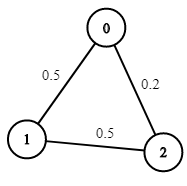

Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.2], start = 0, end = 2
Output: 0.25000
Explanation: There are two paths from start to end, one having a probability of success = 0.2 and the other has 0.5 * 0.5 = 0.25.

Example 2:

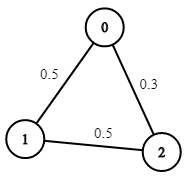

Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.3], start = 0, end = 2
Output: 0.30000

Example 3:

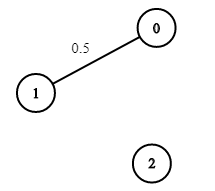

Input: n = 3, edges = [[0,1]], succProb = [0.5], start = 0, end = 2
Output: 0.00000
Explanation: There is no path between 0 and 2.

 

Constraints:

    2 <= n <= 10^4
    0 <= start, end < n
    start != end
    0 <= a, b < n
    a != b
    0 <= succProb.length == edges.length <= 2*10^4
    0 <= succProb[i] <= 1
    There is at most one edge between every two nodes.



In [ ]:
class Solution:
    def maxProbability(self, n: int, edges: List[List[int]], succProb: List[float], start: int, end: int) -> float:
        max_prob = [0] * n
        max_prob[start] = 1
        
        for i in range(n - 1):
            # If there is no larger probability found during an entire round of updates,
            # stop the update process.
            has_update = 0
            for j in range(len(edges)):
                u, v = edges[j]
                path_prob = succProb[j]
                if max_prob[u] * path_prob > max_prob[v]:
                    max_prob[v] = max_prob[u] * path_prob
                    has_update = 1 
                if max_prob[v] * path_prob > max_prob[u]:
                    max_prob[u] = max_prob[v] * path_prob
                    has_update = 1
            if not has_update:
                break
        
        return max_prob[end]